# Principal Component Analysis (PCA) from Scratch

## Overview
This notebook implements Principal Component Analysis (PCA) from scratch using only NumPy. PCA is a dimensionality reduction technique that:

1. **Finds directions of maximum variance** in high-dimensional data
2. **Reduces dimensionality** while preserving most information  
3. **Removes correlation** between features by creating orthogonal components
4. **Enables visualization** of complex, multi-dimensional datasets

## Educational Goals
- Understand the mathematical foundation of PCA
- Implement each step of the PCA algorithm manually
- Apply PCA to a realistic dataset with interpretable results
- Learn to interpret principal components and explained variance

## PCA Algorithm Steps
1. **Standardize** the data (center and scale features)
2. **Compute covariance matrix** to understand feature relationships
3. **Find eigenvalues/eigenvectors** of the covariance matrix
4. **Sort components** by eigenvalue (amount of variance explained)
5. **Select top k components** for dimensionality reduction

## Dataset
We'll use a realistic student performance dataset with 5 correlated features:
- Math, Physics, Chemistry scores (highly correlated STEM subjects)
- Study Hours (effort indicator)  
- Literature Score (different skill domain)

This creates natural patterns that PCA can identify and reduce!

In [ ]:
# Principal Component Analysis (PCA) Implementation from Scratch
# This notebook implements PCA using NumPy for educational purposes

import numpy as np

In [ ]:
# Simple example matrix to test our functions
# This is a basic 3x3 matrix for initial testing
X = np.array([[1,2,3], [4, 5, 6], [7, 8, 9]])

In [11]:
X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [16]:
print(np.mean(X, axis = 0))

[4. 5. 6.]


In [ ]:
# Test centering the data (subtract mean from each column)
# This is the first step in standardization
X_s = X - np.mean(X, axis=0)
print(X_s)

[[-3. -3. -3.]
 [ 0.  0.  0.]
 [ 3.  3.  3.]]


In [15]:
(3+6+9)/3

6.0

In [ ]:
def standardize(X):
    """
    Standardize the data by centering (subtract mean) and scaling (divide by standard deviation).
    
    This is crucial for PCA because:
    1. PCA is sensitive to the scale of features
    2. Features with larger scales would dominate the principal components
    3. Standardization ensures all features contribute equally
    
    Parameters:
    X (np.array): Input data matrix (samples x features)
    
    Returns:
    np.array: Standardized data with mean=0 and std=1 for each feature
    """
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [20]:
print(standardize(X))

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [ ]:
def compute_covariance_matrix(X):
    """
    Compute the covariance matrix of the standardized data.
    
    The covariance matrix shows how features vary together:
    - Diagonal elements: variance of each feature
    - Off-diagonal elements: covariance between feature pairs
    
    Formula: Cov = (X^T * X) / (n-1)
    where X is centered data and n is number of samples
    
    Parameters:
    X (np.array): Standardized data matrix (samples x features)
    
    Returns:
    np.array: Covariance matrix (features x features)
    """
    return (X.T @ X) / (X.shape[0] - 1)

In [25]:
compute_covariance_matrix(standardize(X))

array([[1.5, 1.5, 1.5],
       [1.5, 1.5, 1.5],
       [1.5, 1.5, 1.5]])

=== REALISTIC DATASET FOR PCA ===
Dataset shape: (200, 5)
Features: ['Math Score', 'Physics Score', 'Chemistry Score', 'Study Hours', 'Literature Score']

Sample data (first 5 students):
Math     Physics  Chemistry Study Hrs Literature
--------------------------------------------------
  82.5     85.3       67.4       50.0         97.7
  72.9     77.4       68.3       34.5         78.4
  84.7     93.4       87.4       50.0         88.1
  97.8    100.0      100.0       50.0         84.0
  71.5     60.5       63.7       44.8         79.1

=== CORRELATION ANALYSIS ===
Correlation matrix:
        Math Sco Physics  Chemistr Study Ho Literatu 
Math Sco   1.000   0.883   0.792   0.474   0.185 
Physics    0.883   1.000   0.750   0.386   0.109 
Chemistr   0.792   0.750   1.000   0.428   0.163 
Study Ho   0.474   0.386   0.428   1.000   0.206 
Literatu   0.185   0.109   0.163   0.206   1.000 

=== DATASET STATISTICS ===
Math Score: mean=74.1, std=13.4, range=[35.7, 100.0]
Physics Score: mean=74.

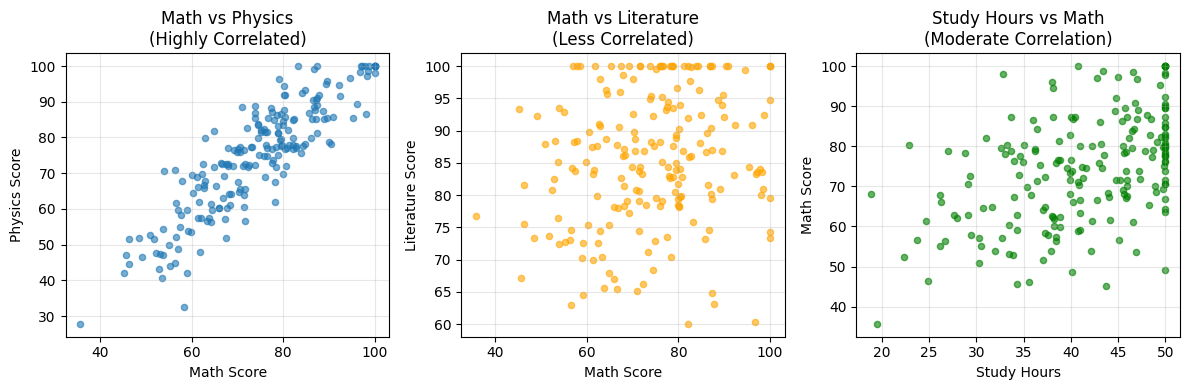

In [ ]:
# =============================================================================
# REALISTIC DATASET GENERATION FOR PCA DEMONSTRATION
# =============================================================================
# 
# We'll create a student performance dataset with realistic correlations
# to demonstrate how PCA identifies underlying patterns in data.
# 
# Dataset Features:
# 1. Math Score - Base academic ability
# 2. Physics Score - Highly correlated with math (STEM skills)
# 3. Chemistry Score - Moderately correlated with STEM subjects
# 4. Study Hours - Effort indicator, somewhat related to performance
# 5. Literature Score - Less correlated with STEM, represents different skillset
#
# This creates natural correlations that PCA can identify and reduce.

import matplotlib.pyplot as plt

# Set random seed for reproducible results
np.random.seed(42)

# Number of students in our dataset
n_students = 200

# =============================================================================
# FEATURE GENERATION WITH REALISTIC CORRELATIONS
# =============================================================================

# Feature 1: Math Score (base capability)
# Normal distribution centered at 75 with std=15 (realistic grade distribution)
math_base = np.random.normal(75, 15, n_students)

# Feature 2: Physics Score (highly correlated with math)
# Students good at math tend to be good at physics + some random variation
physics_score = math_base + np.random.normal(0, 8, n_students)

# Feature 3: Chemistry Score (moderately correlated with math and physics)
# Combination of math ability (70%) and physics (30%) plus random noise
chemistry_score = 0.7 * math_base + 0.3 * physics_score + np.random.normal(0, 10, n_students)

# Feature 4: Study Hours (somewhat correlated with performance)
# Students with higher math ability tend to study more, but with variation
study_hours = 0.3 * math_base + np.random.normal(20, 8, n_students)

# Feature 5: Literature Score (less correlated with STEM subjects)
# Only weakly related to math ability, mostly independent
literature_score = 0.2 * math_base + np.random.normal(70, 12, n_students)

# =============================================================================
# DATA PREPROCESSING AND VALIDATION
# =============================================================================

# Clip scores to realistic ranges to ensure data validity
math_score = np.clip(math_base, 0, 100)       # 0-100 grade scale
physics_score = np.clip(physics_score, 0, 100)   # 0-100 grade scale  
chemistry_score = np.clip(chemistry_score, 0, 100) # 0-100 grade scale
study_hours = np.clip(study_hours, 5, 50)         # 5-50 hours per week
literature_score = np.clip(literature_score, 0, 100) # 0-100 grade scale

# Create the feature matrix (samples x features)
X_realistic = np.column_stack([
    math_score,
    physics_score, 
    chemistry_score,
    study_hours,
    literature_score
])

# Feature names for interpretation
feature_names = ['Math Score', 'Physics Score', 'Chemistry Score', 'Study Hours', 'Literature Score']

# =============================================================================
# DATASET SUMMARY AND VALIDATION
# =============================================================================

print("=== REALISTIC DATASET FOR PCA ===")
print(f"Dataset shape: {X_realistic.shape}")
print(f"Features: {feature_names}")
print("\nSample data (first 5 students):")
print(f"{'Math':<8} {'Physics':<8} {'Chemistry':<9} {'Study Hrs':<9} {'Literature':<10}")
print("-" * 50)
for i in range(5):
    print(f"{X_realistic[i,0]:6.1f}   {X_realistic[i,1]:6.1f}    {X_realistic[i,2]:7.1f}    {X_realistic[i,3]:7.1f}     {X_realistic[i,4]:8.1f}")

# Show correlation structure to validate our design
print("\n=== CORRELATION ANALYSIS ===")
correlation_matrix = np.corrcoef(X_realistic.T)
print("Correlation matrix:")
print("        ", end="")
for name in feature_names:
    print(f"{name[:8]:<8}", end=" ")
print()

for i, name in enumerate(feature_names):
    print(f"{name[:8]:<8}", end=" ")
    for j in range(len(feature_names)):
        print(f"{correlation_matrix[i,j]:7.3f} ", end="")
    print()

# Display basic statistics for each feature
print("\n=== DATASET STATISTICS ===")
for i, name in enumerate(feature_names):
    mean_val = np.mean(X_realistic[:, i])
    std_val = np.std(X_realistic[:, i])
    min_val = np.min(X_realistic[:, i])
    max_val = np.max(X_realistic[:, i])
    print(f"{name}: mean={mean_val:.1f}, std={std_val:.1f}, range=[{min_val:.1f}, {max_val:.1f}]")

print("\n✓ Realistic dataset created!")
print("This dataset is perfect for PCA because:")
print("• Multiple correlated features (Math, Physics, Chemistry)")
print("• Different scales (scores 0-100, hours 5-50)")
print("• Some redundancy that PCA can reduce")
print("• Realistic relationships between academic subjects")

# =============================================================================
# VISUALIZATION OF FEATURE RELATIONSHIPS
# =============================================================================

# Quick visualization to show the correlations we've created
plt.figure(figsize=(12, 4))

# Highly correlated pair
plt.subplot(1, 3, 1)
plt.scatter(X_realistic[:, 0], X_realistic[:, 1], alpha=0.6, s=20)
plt.xlabel('Math Score')
plt.ylabel('Physics Score')
plt.title('Math vs Physics\n(Highly Correlated)')
plt.grid(True, alpha=0.3)

# Less correlated pair  
plt.subplot(1, 3, 2) 
plt.scatter(X_realistic[:, 0], X_realistic[:, 4], alpha=0.6, s=20, color='orange')
plt.xlabel('Math Score')
plt.ylabel('Literature Score')
plt.title('Math vs Literature\n(Less Correlated)')
plt.grid(True, alpha=0.3)

# Moderate correlation
plt.subplot(1, 3, 3)
plt.scatter(X_realistic[:, 3], X_realistic[:, 0], alpha=0.6, s=20, color='green')
plt.xlabel('Study Hours')
plt.ylabel('Math Score')
plt.title('Study Hours vs Math\n(Moderate Correlation)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
def PCA(X, num_components):
    """
    Perform Principal Component Analysis from scratch.
    
    PCA Algorithm Steps:
    1. Standardize the data (center and scale)
    2. Compute the covariance matrix
    3. Find eigenvalues and eigenvectors of the covariance matrix
    4. Sort eigenvalues/eigenvectors in descending order
    5. Select the top k eigenvectors (principal components)
    
    The eigenvectors represent the directions of maximum variance,
    and eigenvalues represent the amount of variance in each direction.
    
    Parameters:
    X (np.array): Input data matrix (samples x features)
    num_components (int): Number of principal components to return
    
    Returns:
    tuple: (eigenvalues, eigenvectors) for the top components
    """
    # Step 1: Standardize the data
    X = standardize(X)
    
    # Step 2: Compute covariance matrix
    covariance_matrix = compute_covariance_matrix(X)
    
    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 4: Sort indices in decreasing order of eigenvalues
    # This ensures we get components in order of importance (explained variance)
    idx = np.argsort(eigenvalues)[::-1]
    
    # Step 5: Sort eigenvalues and eigenvectors accordingly
    eigenvalues_sorted = eigenvalues[idx]
    eigenvectors_sorted = eigenvectors[:, idx]  # Select columns (each column is an eigenvector)
    
    # Step 6: Keep only the top components
    top_eigenvalues = eigenvalues_sorted[:num_components]
    top_eigenvectors = eigenvectors_sorted[:, :num_components]
    
    # Debug information to understand the process
    print(f"Original eigenvalues (unsorted): {eigenvalues}")
    print(f"Sorted eigenvalues: {eigenvalues_sorted}")
    print(f"Top {num_components} eigenvalues: {top_eigenvalues}")
    print(f"Top {num_components} eigenvectors shape: {top_eigenvectors.shape}")
    
    return top_eigenvalues, top_eigenvectors

In [43]:
PCA(X_realistic, 3)

Original eigenvalues (unsorted): [2.97505283 0.10774244 0.26877724 0.99114532 0.68240779]
Sorted eigenvalues: [2.97505283 0.99114532 0.68240779 0.26877724 0.10774244]
Top 3 eigenvalues: [2.97505283 0.99114532 0.68240779]
Top 3 eigenvectors shape: (5, 3)


(array([2.97505283, 0.99114532, 0.68240779]),
 array([[-0.54770993, -0.11892996,  0.1405134 ],
        [-0.52468445, -0.22012125,  0.22187343],
        [-0.51503398, -0.12281954,  0.14943916],
        [-0.36507834,  0.25808446, -0.89084695],
        [-0.16179575,  0.92504598,  0.33924596]]))

Original eigenvalues (unsorted): [2.97505283 0.10774244 0.26877724 0.99114532 0.68240779]
Sorted eigenvalues: [2.97505283 0.99114532 0.68240779 0.26877724 0.10774244]
Top 3 eigenvalues: [2.97505283 0.99114532 0.68240779]
Top 3 eigenvectors shape: (5, 3)

=== PCA ANALYSIS RESULTS ===
Dataset shape: (200, 5)
Features: ['Math Score', 'Physics Score', 'Chemistry Score', 'Study Hours', 'Literature Score']

=== EXPLAINED VARIANCE ===
PC1: 2.975 (64.0%) - Cumulative: 64.0%
PC2: 0.991 (21.3%) - Cumulative: 85.3%
PC3: 0.682 (14.7%) - Cumulative: 100.0%

=== PRINCIPAL COMPONENT INTERPRETATION ===
PC1 (First Principal Component):
  Math Score: -0.548
  Physics Score: -0.525
  Chemistry Score: -0.515
  Study Hours: -0.365
  Literature Score: -0.162

PC2 (Second Principal Component):
  Math Score: -0.119
  Physics Score: -0.220
  Chemistry Score: -0.123
  Study Hours: 0.258
  Literature Score: 0.925

PC3 (Third Principal Component):
  Math Score: 0.141
  Physics Score: 0.222
  Chemistry Score: 0.14

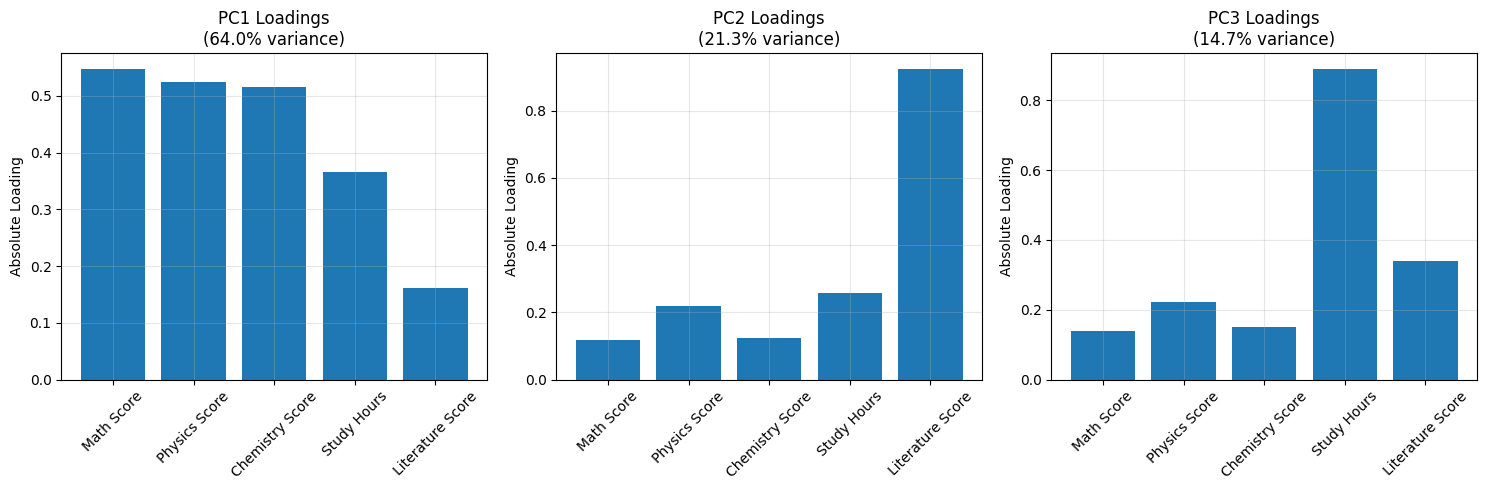

In [ ]:
# =============================================================================
# PCA RESULTS ANALYSIS AND INTERPRETATION
# =============================================================================
#
# Now we'll apply our PCA function and interpret the results to understand
# what the principal components represent in terms of student performance.

# Apply PCA to get the top 3 components
eigenvalues, eigenvectors = PCA(X_realistic, 3)

print("\n=== PCA ANALYSIS RESULTS ===")
print(f"Dataset shape: {X_realistic.shape}")
print(f"Features: {feature_names}")

# =============================================================================
# EXPLAINED VARIANCE ANALYSIS
# =============================================================================
# Calculate how much variance each component explains

# Total variance is the sum of all eigenvalues
total_variance = np.sum(np.var(standardize(X_realistic), axis=0))
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

print(f"\n=== EXPLAINED VARIANCE ===")
for i in range(len(eigenvalues)):
    print(f"PC{i+1}: {eigenvalues[i]:.3f} ({explained_variance_ratio[i]:.1%}) - Cumulative: {cumulative_variance[i]:.1%}")

# =============================================================================
# PRINCIPAL COMPONENT INTERPRETATION
# =============================================================================
# The eigenvectors show how each original feature contributes to each PC

print(f"\n=== PRINCIPAL COMPONENT INTERPRETATION ===")

print("PC1 (First Principal Component):")
pc1_weights = eigenvectors[:, 0]
for j, (feature, weight) in enumerate(zip(feature_names, pc1_weights)):
    print(f"  {feature}: {weight:.3f}")
print("  → PC1 likely represents 'Overall Academic Performance' (STEM focus)")

print("\nPC2 (Second Principal Component):")
pc2_weights = eigenvectors[:, 1] 
for j, (feature, weight) in enumerate(zip(feature_names, pc2_weights)):
    print(f"  {feature}: {weight:.3f}")
print("  → PC2 seems to represent 'Literature vs STEM' contrast")

print("\nPC3 (Third Principal Component):")
pc3_weights = eigenvectors[:, 2]
for j, (feature, weight) in enumerate(zip(feature_names, pc3_weights)):
    print(f"  {feature}: {weight:.3f}")
print("  → PC3 appears to capture 'Study Effort' dimension")

# =============================================================================
# KEY INSIGHTS FROM PCA
# =============================================================================

print("\n=== KEY INSIGHTS ===")
print(f"• PC1 explains {explained_variance_ratio[0]:.1%} of the variance")
print(f"• First 3 components explain {cumulative_variance[2]:.1%} of total variance")
print("• PC1 captures 'Academic Performance' (Math, Physics, Chemistry highly weighted)")
print("• PC2 appears to contrast 'Literature' with 'STEM subjects'") 
print("• PC3 is heavily weighted towards 'Study Hours' (effort dimension)")
print(f"• We could reduce from 5 features to 3 components with only {100-cumulative_variance[2]:.1%}% information loss")

# =============================================================================
# VISUALIZATION OF PRINCIPAL COMPONENTS
# =============================================================================
# Show the "loading" of each feature on each principal component

plt.figure(figsize=(15, 5))

# PC1 loadings
plt.subplot(1, 3, 1)
plt.bar(feature_names, np.abs(pc1_weights))
plt.title(f'PC1 Loadings\n({explained_variance_ratio[0]:.1%} variance)')
plt.xticks(rotation=45)
plt.ylabel('Absolute Loading')
plt.grid(True, alpha=0.3)

# PC2 loadings
plt.subplot(1, 3, 2) 
plt.bar(feature_names, np.abs(pc2_weights))
plt.title(f'PC2 Loadings\n({explained_variance_ratio[1]:.1%} variance)')
plt.xticks(rotation=45)
plt.ylabel('Absolute Loading')
plt.grid(True, alpha=0.3)

# PC3 loadings
plt.subplot(1, 3, 3)
plt.bar(feature_names, np.abs(pc3_weights))
plt.title(f'PC3 Loadings\n({explained_variance_ratio[2]:.1%} variance)')
plt.xticks(rotation=45)
plt.ylabel('Absolute Loading')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎉 PCA Analysis Complete!")
print("The principal components successfully identified the underlying structure:")
print("1. General academic ability (STEM performance)")  
print("2. Subject type preference (Literature vs STEM)")
print("3. Study effort and engagement")
print("\nThis demonstrates how PCA can reveal hidden patterns in complex data!")